## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("athlete_events.csv", sep=";")

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,London,Judo
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Calgary,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,Innsbruck,Luge
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,Sochi,Ski Jumping
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,Sochi,Ski Jumping
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,Nagano,Bobsleigh


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 22.8+ MB


In [5]:
# Drop duplicates
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189778 entries, 0 to 271115
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      189778 non-null  int64  
 1   Name    189778 non-null  object 
 2   Sex     189778 non-null  object 
 3   Age     182840 non-null  float64
 4   Height  149750 non-null  float64
 5   Weight  148289 non-null  float64
 6   Team    189778 non-null  object 
 7   NOC     189778 non-null  object 
 8   Games   189778 non-null  object 
 9   City    189778 non-null  object 
 10  Sport   189778 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 17.4+ MB


In [7]:
# Drop missing values. Per fer el PCA és important que no tinguem missing values
df.isna().sum()

ID            0
Name          0
Sex           0
Age        6938
Height    40028
Weight    41489
Team          0
NOC           0
Games         0
City          0
Sport         0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(146428, 11)

#### Dummies

In [10]:
# Fem get_dummies per a les variables categòriques excepte el nom de les atletes. Creem un df per a cada variable
# Fem drop_first = True perque com Sex només adopta dues opcions, amb una columna binaria (0 o 1) ja recollim tota la informació.
sex = pd.get_dummies(df['Sex'], drop_first=True)
team = pd.get_dummies(df['Team'], drop_first=True)
noc = pd.get_dummies(df['NOC'], drop_first=True)
games = pd.get_dummies(df['Games'], drop_first=True)
city = pd.get_dummies(df['City'], drop_first=True)
sport = pd.get_dummies(df['Sport'], drop_first=True)

In [11]:
type(sex)

pandas.core.frame.DataFrame

In [12]:
#Concatenem els df per crear un sol df amb les variables normalitzades
dummies_df = pd.concat([sex, team, noc, games, city,sport], axis=1)
dummies_df.shape

(146428, 1031)

#### Standard Scaler

In [13]:
# Fem un nou df amb només les variables numèriques
df_no_object = df.select_dtypes(exclude=['object'])
df_no_object = df_no_object.loc[:, df_no_object.columns != 'ID']
df_no_object.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
4,21.0,185.0,82.0
6,25.0,185.0,82.0
8,27.0,185.0,82.0


In [14]:
# Com hem eliminat alguns registres del df original, hem d'assegurar-nos que l'index del df escalat és igual
# que l'original, per això especifiquem "index=df_no_object.index" quan creem el nou df

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_no_object_scaled = pd.DataFrame(scaler.fit_transform(df_no_object),columns = df_no_object.columns, index=df_no_object.index)

In [15]:
df_no_object_scaled.head()

,Age,Height,Weight
0,-0.275915,0.326808,0.506095
1,-0.461075,-0.637216,-0.846032
4,-0.831395,0.808821,0.641308
6,-0.090755,0.808821,0.641308
8,0.279565,0.808821,0.641308


## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [16]:
#Unim els df dummies_df i new_df_scaled per fer el PCA.
print(dummies_df.shape)
print(df_no_object_scaled.shape)

(146428, 1031)
(146428, 3)


In [18]:
dummies_scaled_df = pd.concat([dummies_df,df_no_object_scaled], axis=1)

In [19]:
dummies_scaled_df.head()

,M,Acipactli,Afghanistan,Akatonbo,Alain IV,Albania,Aldebaran,Aldebaran II,Aletta,Algeria,...,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,Age,Height,Weight
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.275915,0.326808,0.506095
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.461075,-0.637216,-0.846032
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.831395,0.808821,0.641308
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.090755,0.808821,0.641308
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.279565,0.808821,0.641308


#### PCA

In [20]:
#Com que abans hem estandaritzat la data, podem fer el PCA directament sense fer més transformacions
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(dummies_scaled_df)
df_pca = pd.DataFrame(pca.transform(dummies_scaled_df))

In [21]:
#El nou df amb el PCA
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.580355,-0.416684,0.154927,-0.129106,-0.112603,0.000685,0.018601,-0.025298,0.046729,0.040053
1,-1.052499,-0.243081,-0.039017,-0.108671,0.087186,-0.170707,-0.114792,0.104630,1.217732,-0.310045
2,0.687712,-1.026038,-0.091991,0.665914,-0.169319,-0.025592,-0.081310,0.064769,0.059179,0.093249
3,0.838478,-0.305910,-0.150485,0.668982,-0.182490,-0.033554,-0.087553,0.067649,0.059691,0.104711
4,0.913951,0.051659,-0.168484,0.665958,-0.202310,-0.036889,-0.092744,0.071065,0.065468,0.123824


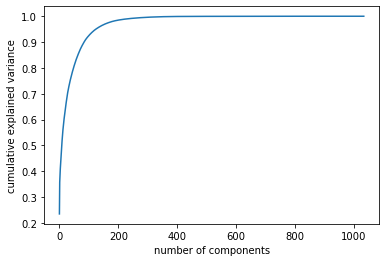

In [22]:
pca = PCA().fit(dummies_scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Si volguessim utilitzar el PCA per reduir la dimensionalitat del df podriem utilitzar el gràfic anterior per decidir quants components volem mantindre tenint en compte la variancia que expliquen. O, el que es el mateix, quanta variancia estem disposats a perdre per reduir la dimensionalitat del df.

## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [24]:
# Comprovem si hi ha outliers en el df
#Finding first quartile and third quartile
q1, q3= np.percentile(df_no_object['Age'],[25,75])
q1, q3

(22.0, 28.0)

Els valors que siguin per sota del lower bound o per sobre del upper bound els considerarem outliers

In [25]:
#Find the IQR which is the difference between third and first quartile
iqr = q3 - q1

#Find lower and upper bound
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

print(lower_bound)
print(upper_bound)

13.0
37.0


Comprobem si les nostres variables tenen valors per sota de 13 o per sobre de 37. 

In [27]:
print(df_no_object['Age'].min())
print(df_no_object['Age'].max())

11.0
71.0


I efectivament tenim com a mínim un valor per sota de 13 i un per sobre de 37. Això vol dir que si normalitzem les dades tenint en compte els outliers, els valors normalitzats haurien de ser diferents que amb el StandardScaler que hem utilitzat abans.

In [28]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df_no_object)
transformer

array([[-0.16666667,  0.23076923,  0.47368421],
       [-0.33333333, -0.53846154, -0.57894737],
       [-0.66666667,  0.61538462,  0.57894737],
       ...,
       [ 0.33333333, -0.07692308, -0.63157895],
       [ 0.83333333,  0.61538462,  1.31578947],
       [ 1.5       ,  0.61538462,  1.31578947]])

In [31]:
df_robust = pd.DataFrame(transformer.transform(df_no_object), index=df_no_object.index, columns=df_no_object.columns)

In [33]:
df_robust.describe()

,Age,Height,Weight
count,146428.000000,146428.000000,146428.000000
mean,0.081691,-0.030003,0.079689
std,0.900126,0.797940,0.778503
min,-2.333333,-3.846154,-2.421053
25%,-0.500000,-0.538462,-0.473684
50%,0.000000,0.000000,0.000000
75%,0.500000,0.461538,0.526316
max,7.666667,3.769231,7.526316


In [38]:
# Comparem els resultats amb el df normalitzat amb SandardScaler
df_no_object_scaled.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Age,Height,Weight
count,146428,146428,146428
mean,2.63343e-15,-1.2956e-15,-2.10659e-16
std,1,1,1
min,-2.68299,-4.78252,-3.21225
25%,-0.646235,-0.637216,-0.710819
50%,-0.0907553,0.037601,-0.102362
75%,0.464725,0.616016,0.573701
max,8.4266,4.76132,9.56534


En els df anteriors podem comparar el funcionament del RobustScaler i el StandardScaler. Mentre el primer centra les dades al voltant de zero (la mediana sempre es zero), el segon centra el std a 1. 
Encara que sembli que canvia poca cosa, si ens fixem en els valors màxims i mínims, aquests son sempre més extrems en el cas del StandardScaler.
En el cas del RobustScaler, a més, podem veure com el primer quartil és sempre al voltant de -0.5, el segon (mediana) és zero i el tercer és sempre al voltant de 0.5.